In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# feature matrix
X=heart_disease.drop("target",axis=1)

#label 
y=heart_disease["target"]

In [4]:
#choose right model and hypermeter
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.get_params()

In [5]:
#fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    

In [6]:
clf.fit(X_train,y_train)

In [7]:
#make a prediction
y_pred = clf.predict(X_test)
y_pred

In [8]:
y_test

In [9]:
#evaluate the model on the training data
clf.score(X_train,y_train)


In [10]:
clf.score(X_test,y_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))

In [12]:
print(confusion_matrix(y_test,y_pred))

In [13]:
accuracy_score(y_test,y_pred)

In [14]:
np.random.seed(10)

for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"model accuracy on test set: {clf.score(X_test,y_test)*100:2f}%")
    print(" ")

In [15]:
#save the model

import pickle
pickle.dump(clf,open("random_forest_1.pkl","wb"))

In [16]:
load_model=pickle.load(open("random_forest_1.pkl","rb"))
load_model.score(X_test,y_test)

In [17]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()

In [18]:
X = car_sales.drop("Price",axis=1)
y=car_sales["Price"]


In [19]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transform_X = transformer.fit_transform(X)


X_test,X_train,y_test,y_train=train_test_split(transform_X,y,test_size=0.2)
model.fit(X_train,y_train)


In [21]:
pd.DataFrame(dense_X)

In [ ]:
model.score(X_test,y_test)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

# Imputation 


In [ ]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(20)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X =car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [ ]:
car_sales_missing["Doors"].value_counts()

# filling with pandas 

In [ ]:
car_sales_missing["Make"].fillna("missing",inplace=True)

car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#REMOVE ROWS WITH MISSING PRICE VALUE
car_sales_missing.dropna(inplace=True)


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transform_X = transformer.fit_transform(car_sales_missing)
transform_X


 # fill missing values with scikit learn

In [ ]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#drop the rows with no labels

car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
#fill missing values throug scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical value with missing and numerical value with mean
cat_imputer =SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                            ("door_imputer",door_imputer,door_features),
                            ("num_imputer",num_imputer,num_features)
                            ])
filled_X=imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transform_X = transformer.fit_transform(car_sales_filled)
transform_X

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transform_X,
                                              y,
                                              test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


# regression on california housing

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

In [ ]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

In [ ]:
housing_df["target"]=housing["target"]
housing_df.head()

In [ ]:
housing_df.isna().sum()

In [ ]:
housing_df.dtypes

In [ ]:
housing_df=housing_df.drop("MedHouseVal",axis=1)

In [ ]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import Ridge

rf= Ridge()

model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

 # Choosing an estimator for classification problem:-

In [ ]:
heart_disease =pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
np.random.seed(42)


X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=LinearSVC()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

* if you have structured data  use ensemble methods
* if you have unstructured data use deep learning or transfered learning

# make predictions with the machine learning model 

* use the train model to make predictions 

* predict()
* predict_proba()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
y_preds =clf.predict(X_test)
np.mean(y_preds ==y_test)

In [ ]:
clf.score(X_test,y_preds)

using the `predcit_proba()` function

* it is used to predict the probabilites of the classifications:-

In [ ]:
clf.predict_proba(X_test[:5])

In [ ]:
clf.predict(X_test[:5])

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)

y_preds=model.predict(X_test)


In [ ]:
y_preds[:5]

In [ ]:
np.array(y_test[:10])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

# Evaluating model with `score` method

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)


* evaluating a model using `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train);

In [ ]:
clf.score(X_test,y_test)

In [ ]:
cross_val_score(clf,X,y)

In [ ]:
np.random.seed(42)

clf_single = clf.score(X_test,y_test)

clf_cross = np.mean(cross_val_score(clf,X,y))

clf_single , clf_cross


In [ ]:
#default scoring parameter of classifier  = mean accuracy

clf.score()

In [ ]:
#scoring parameter set None by default

cross_val_score(clf,X,y,scoring= None)

# classification  model evolution matrix

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

# Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

cross_val_score=cross_val_score(clf,X,y)
cross_val_score

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"heart Disease Classifier Accuracy cross_validator_accuracy: {np.mean(np.mean(cross_val_score))*100:.2f}%")

# * Area under  the reciever operating characterstic curve (AUC) * 

* Area under  cruve
* ROC curve

 * ROC curves  are a comparison  of model's  true postitive rate vs the false positive rate

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
fpr , tpr, thresholds  = roc_curve(y_test,y_probs_positive)
fpr

In [ ]:
import matplotlib.pyplot as plt 

def roc_curve(fpr,tpr):
    
    plt.plot(fpr,tpr ,color="orange" , label = "ROC")
    
    plt.plot([0,1],[0,1] , color = "darkblue",linestyle ="--",label = "Guessing")
    
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC")
    
    plt.legend()
    plt.show()
    
roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_test)
roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

# Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [7]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted label"])

Predicted label,0,1
Actual Label,,
0,24,5
1,4,28


<Axes: >

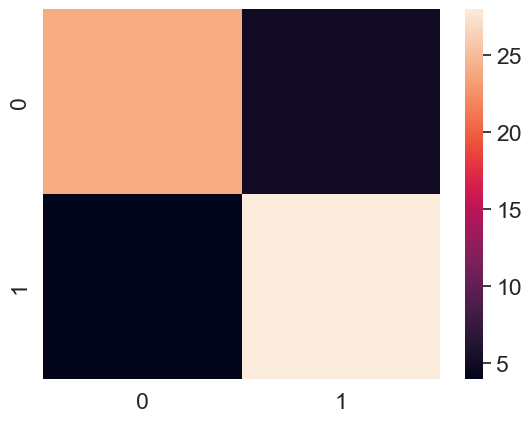

In [8]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

In [9]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done


ERROR conda.notices.fetch:get_channel_notice_response(67): Request error <HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/main/notices.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='repo.anaconda.com', port=443): Read timed out. (read timeout=5)"))> for channel: defaults url: https://repo.anaconda.com/pkgs/main/notices.json
ERROR conda.notices.fetch:get_channel_notice_response(67): Request error <HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/r/notices.json (Caused by ReadTimeoutError("HTTPSConnectionPool(host='repo.anaconda.com', port=443): Read timed out. (read timeout=5)"))> for channel: defaults url: https://repo.anaconda.com/pkgs/r/notices.json
ERROR conda.notices.fetch:get_channel_notice_response(67): Request error <HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/msys2/notices.json (Caused by ReadTimeoutError("HTTPSConnectionPool(

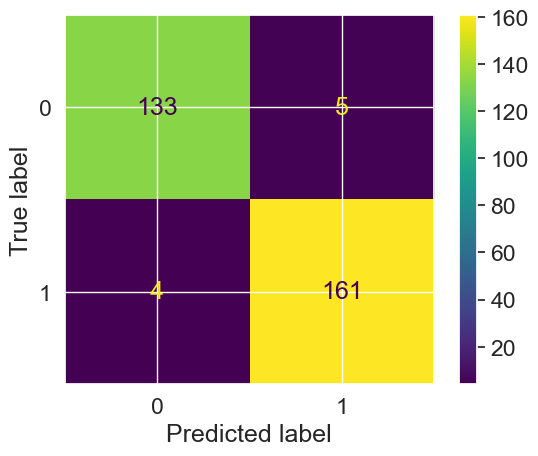

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
    
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

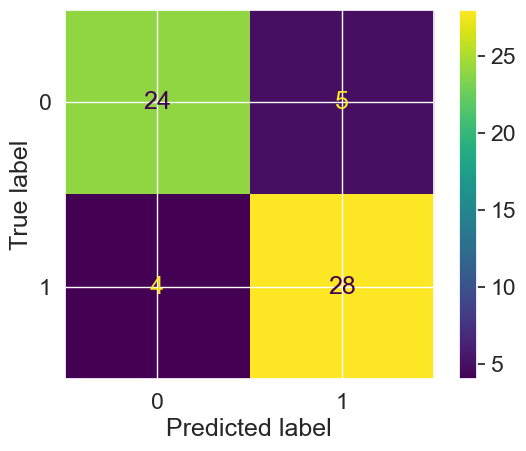

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true= y_test,y_pred = y_preds);

# classification report

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [5]:
# where `precision` & `recall` bceome vaueable:

disease_true = np.zeros(10000)

disease_true[0]=1

disease_preds =  np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# Regression model evaltaion 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model= RandomForestRegressor()

model.fit(X_train,y_train)



In [ ]:
model.score(X_test,y_test)

In [ ]:
y_test

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test) , y_test.mean())

In [ ]:
 y_test_mean

In [ ]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

In [ ]:
r2_score(y_true = y_test,
         y_pred = y_test)

# MAE

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)

mae

In [ ]:
df = pd.DataFrame(data = {"actual values": y_test , "predicted values" : y_preds})

df["Differences"] = df["predicted values"] - df["actual values"]

df.head(10)

In [ ]:
df["Differences"].mean()

In [ ]:
np.abs(df["Differences"]).mean()

# mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test , y_preds)

mse

In [ ]:
df["squared_differences"] = np.square(df["Differences"])
df.head()

 # Finally using the `scoring` parameter 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

np.random.seed(42)


X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X ,y ,scoring = None)
cv_acc

In [ ]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X ,y ,scoring ="accuracy")
cv_acc

In [ ]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
np.random.seed(42)
cv_prec= cross_val_score(clf, X ,y ,scoring ="precision")
cv_prec

In [ ]:
print(f"The cross-validated precision is: {np.mean(cv_prec)}")

In [ ]:
np.random.seed(42)
cv_recall= cross_val_score(clf, X ,y ,scoring ="recall")
cv_recall

In [ ]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

for regression problem

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

model = RandomForestRegressor()


In [ ]:
np.random.seed(42)
cv = cross_val_score(model,X,y,scoring = None)
np.mean(cv)

In [ ]:
cv #r2


In [ ]:
cv_mse =  cross_val_score(model,X,y,scoring ="neg_mean_squared_error")
np.mean(cv_mse) 

In [ ]:
cv_mse #lower the best or close to 0 is best

In [ ]:
cv_mae =  cross_val_score(model,X,y,scoring ="neg_mean_absolute_error")
np.mean(cv_mae)#lower the best or close to 0 is best

In [ ]:
cv_mae #lower the best or close to 0 is best

# using `scikit` funtion for evaluating 

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)
print("Classification metrics  on the test set ")
print(f"Accuracy socre : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision socre : {precision_score(y_test,y_preds)}")
print(f"Recall socre : {recall_score(y_test,y_preds)}")
print(f"f1 socre : {f1_score(y_test,y_preds)}")

Classification metrics  on the test set 
Accuracy socre : 85.25%
Precision socre : 0.8484848484848485
Recall socre : 0.875
f1 socre : 0.8615384615384615


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

model= RandomForestRegressor()

model.fit(X_train,y_train)

y_preds = model.predict(X_test)

print("Regression metrics for a model")

print(f"R2_score :{r2_score(y_test,y_preds)}")
print(f"mean absolute error :{mean_absolute_error(y_test,y_preds)}")
print(f"mean squared error : {mean_squared_error(y_test,y_preds)}")

# imporoving a model:

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 # tunning hyperparameters by hand :-

 training , validation and test data

In [5]:

def evaluate_preds(y_true ,y_preds):
    '''
    performs evaluation comparison  on y_true labels vs y_pred labels.
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    
    metric_dict = {"accuracy" : round(accuracy,2),
                   "precision" : round(precision,2),
                   "recall" : round(recall,2),
                   "f1" : round(f1,2)}
    print(f"Acc : {accuracy * 100:.2f}%")
    print(f"Precison : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 : {f1:.2f}%")
    return metric_dict
    

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
np.random.seed(42)

heart_disease_shuffle = heart_disease.sample(frac=1)

X = heart_disease_shuffle.drop("target",axis=1)
y = heart_disease_shuffle["target"]

train_split = round(0.7 * len(heart_disease_shuffle))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffle))

X_train , y_train = X[:train_split], y[:train_split]
X_valid , y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test  , y_test  = X[valid_split:] , y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc : 82.22%
Precison : 0.81
Recall : 0.88
F1 : 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [11]:
np.random.seed(42)

#creating another classifier with different hyperparameters

clf_2 = RandomForestClassifier(max_depth = 10)
clf_2.fit(X_train,y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc : 97.78%
Precison : 1.00
Recall : 0.96
F1 : 0.98%


# Hyperparameter tunning with randomised search cv



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(43)

X = heart_disease_shuffle.drop("target",axis = 1)
y = heart_disease_shuffle["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


clf = RandomForestClassifier(n_jobs = 1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose = 2)


rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   7.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000

C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   8.1s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   7.3s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.5s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   6.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.6s
[CV] END max_depth=None, max_

C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.7s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   8.9s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  14.9s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [17]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [18]:
# lets make predictions with the best paramaters

rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc : 85.25%
Precison : 0.91
Recall : 0.83
F1 : 0.87%


## Hypter parameter tunning with GridSearchCV

In [10]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [4]:
grid_2={"n_estimators":[100,200,500],
        "max_depth": [None],
        "max_features":["auto","sqrt"],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

In [7]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(43)

X = heart_disease_shuffle.drop("target",axis = 1)
y = heart_disease_shuffle["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


clf = RandomForestClassifier(n_jobs = 1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose = 2)


gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.0s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.1s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.3s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.3s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.3s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.5s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.9s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.3s


C:\Users\ag536\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.8s
[CV] END max_depth=None,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [14]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [15]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)


Acc : 80.33%
Precison : 0.90
Recall : 0.75
F1 : 0.82%


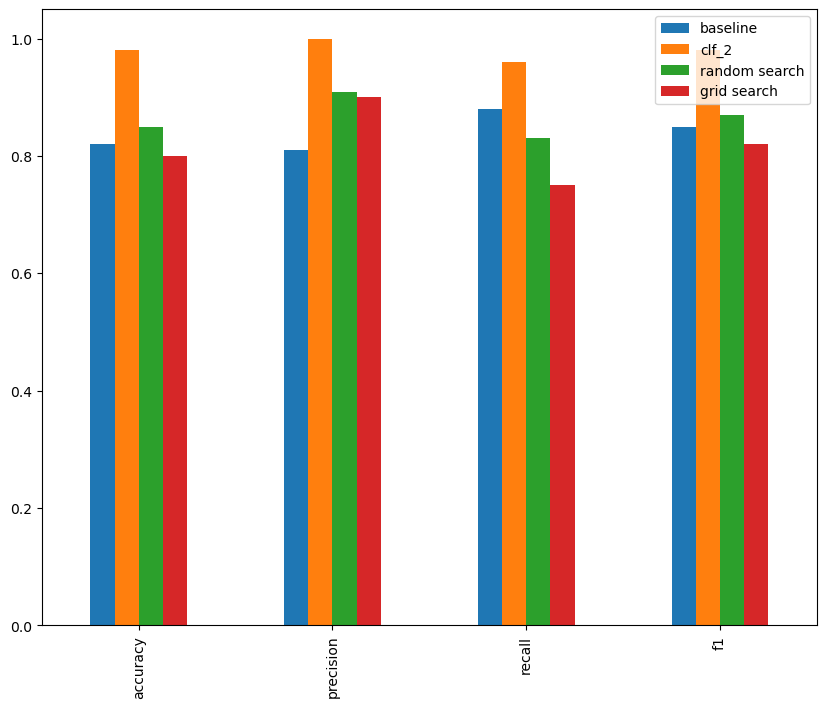

In [19]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "random search":rs_metrics,
                                "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

# saving and loading trained machine learning model
1. by using python's `pickle` module
2. `joblib`

`pickle`

In [20]:
import pickle

#save an existing  model

pickle.dump(gs_clf,open("gs_random_forest_classifier_model_1.pkl","wb"))

In [24]:
#load a saved model
pickle_model = pickle.load(open("gs_random_forest_classifier_model_1.pkl","rb"))

In [ ]:
#make some predictions
pickle_y_preds=pickle_model.predict(X_test)
evaluate_preds(yloaded__test,pickle_y_preds)

`joblib`

In [22]:
from joblib import dump,load

dump(gs_clf,filename="gs_random_forest_classifier_model_1.joblib")

['gs_random_forest_classifier_model_1.joblib']

In [23]:
loaded_joblib_model = load(filename="gs_random_forest_classifier_model_1.joblib")

In [ ]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

# Putting it all together

In [27]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [28]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [30]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# steps  we do all in 1 cell:
    1. fill missing data
    2. convert data in numbers
    3. build model on that data 

In [2]:
# getting the data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# modeling 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

#setup random seed
import  numpy as np
np.random.seed(42)


#import the data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace = True)

# define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("oneHot",OneHotEncoder(handle_unknown="ignore"))
])
numeric_features = ["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value = 4))
])
#setup preprocessing steps (fill missing values ,then convert to numbers)
preprocessor = ColumnTransformer(
                                transformers = [
                                    ("cat",categorical_transformer,categorical_features),
                                    ("door",door_transformer,door_feature),
                                    ("num",numeric_transformer,numeric_features)
                                ])
#modeling
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model",RandomForestRegressor())])

#SPLIT DATA 
X = data.drop("Price",axis =1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

#fitting the data
 
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.22188417408787875

# using  `GridSearchCV` and `RandomizedSearchCV`


In [3]:
# using  GridSearchCV with our  regression Pipelinemodel
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators" : [100,1000],
    "model__max_depth" :[None,5],
    #"model__max_features" : ["auto"],
    "model__min_samples_split" : [2,4]
}

gs_model = GridSearchCV(model , pipe_grid , cv= 5 , verbose = 2)

gs_model.fit(X_train,y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   1.5s
[CV] END model__max_depth=None, model__min_samples_spli

[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   9.4s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   4.5s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   4.6s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   7.1s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('oneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [4]:
model.score(X_test,y_test)

0.22188417408787875